In [1]:
import pandas as pd
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame

import numpy as np

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams

from pmdarima.arima import auto_arima

import matplotlib.pyplot as plt

import yfinance as yf

from datetime import datetime
from datetime import timedelta

import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

C:\Users\Sivar\AppData\Local\Temp\ipykernel_3860\4018892369.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


[*********************100%%**********************]  1 of 1 completed
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6826.500, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6828.327, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6827.933, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-6827.958, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-6833.005, Time=0.50 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-6831.766, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6833.887, Time=1.94 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-6831.681, Time=1.37 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-6829.820, Time=0.66 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6830.952, Time=1.78 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6832.107, Time=0.24 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-6831.562, Time=2.54 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-6835.435, Time=0.56 sec
 ARIMA(1,1,1)(0,0

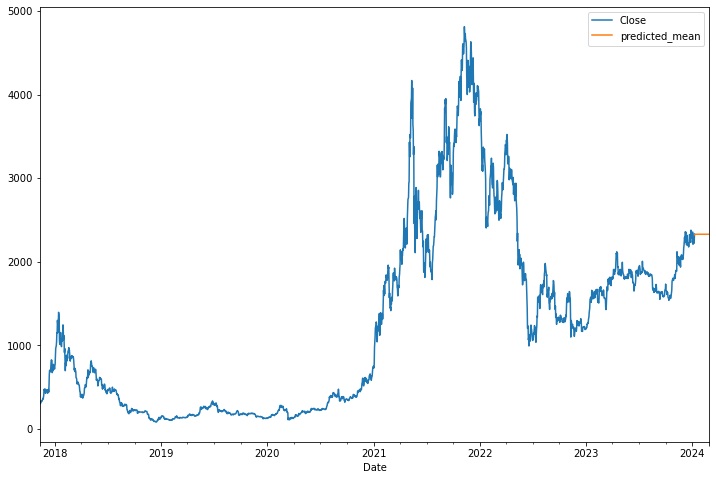

In [5]:
def ARIMA_Function(Name_of_Coin):   
    #getting data
    today = datetime.today().strftime('%Y-%m-%d')
    start_date = '2016-01-01'
    eth_df = yf.download(Name_of_Coin ,start_date, today)
    eth_df.tail()

    # Preprocess data
    dataset_ex_df = eth_df.copy()
    dataset_ex_df = dataset_ex_df.reset_index()
    dataset_ex_df['Date'] = pd.to_datetime(dataset_ex_df['Date'])
    dataset_ex_df.set_index('Date', inplace=True)
    dataset_ex_df = dataset_ex_df['Close'].to_frame()
    df = dataset_ex_df
    
    df_close = dataset_ex_df['Close']
    
    df_log = np.log(df_close)
    
    #split data into train and training set
    train_data, test_data = df_log[3:int(len(df_close)*0.95)], df_log[int(len(df_log)*0.95):]
    
    
    def ARIMACheck(data):
        fit = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
        return fit
    
    model_future = ARIMA(df, order = ARIMACheck(df).get_params().get("order"))
    results_future = model_future.fit()
    predictions_future = results_future.predict(len(df),len(df)+50,typ = 'levels')
    df.plot(legend=True , figsize = (12,8))
    predictions_future.plot(legend=True)

    print(df[-2:])
    print(predictions_future[:1])

ARIMA_Function('ETH-USD')